# 1. Import

In [28]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix

plt.rcParams['figure.figsize']=(8,6)

In [29]:
df = pd.read_csv('datasets/breast-cancer.csv')
# df= df.drop('Unnamed: 32',axis=1)

In [30]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [32]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [33]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

# 2. Preprocessing

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [35]:
df=df.drop('id', axis=1)

In [36]:
def MinMaxScaler(x):
    return (x-min(x))/(max(x)-min(x))

In [37]:
y=df['diagnosis']
X=df.drop('diagnosis',axis=1)

In [38]:
for c in X.columns:
    X[c]=MinMaxScaler(X[c])

In [39]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=18)

In [40]:
y_train

2      1
128    0
205    1
101    0
217    0
      ..
242    0
174    0
120    0
275    0
298    0
Name: diagnosis, Length: 426, dtype: int32

# 3. Training Model

In [41]:
models={"Logistic Regression": LogisticRegression(), 
        "SVM": SVC(),
        "K-nearest neighbor": KNeighborsClassifier(),
        }

In [42]:
def fit_models(X_train, y_train, X_test, y_test):
    models={"Logistic Regression": LogisticRegression(), 
            "SVM": SVC(),
            "K-nearest neighbor": KNeighborsClassifier(),
           }
    cr = []
    for model_name,model in models.items():
        model.fit(X_train,y_train)
        y_pred= model.predict(X_test)
        print(model_name)
        print(f'Precision score: {precision_score(y_test, y_pred)*100:.2f}%')
        print(f'Accuracy score: {accuracy_score(y_test, y_pred)*100:.2f}%')
        print(f'Recall score: {recall_score(y_test, y_pred)*100:.2f}%')
        print(f'f1 score: {f1_score(y_test, y_pred)*100:.2f}%')
        print('---')

        cr.append(confusion_matrix(y_test, y_pred))
    return cr

In [43]:
cf_m = fit_models(X_train, y_train, X_test, y_test)

Logistic Regression
Precision score: 100.00%
Accuracy score: 95.80%
Recall score: 89.66%
f1 score: 94.55%
---
SVM
Precision score: 100.00%
Accuracy score: 98.60%
Recall score: 96.55%
f1 score: 98.25%
---
K-nearest neighbor
Precision score: 100.00%
Accuracy score: 97.90%
Recall score: 94.83%
f1 score: 97.35%
---


D:\Anaconda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Logistic Regression


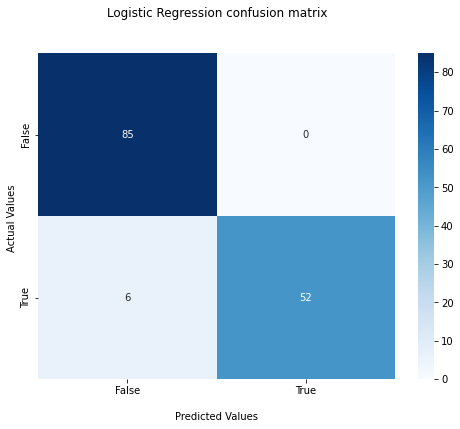

----


SVM


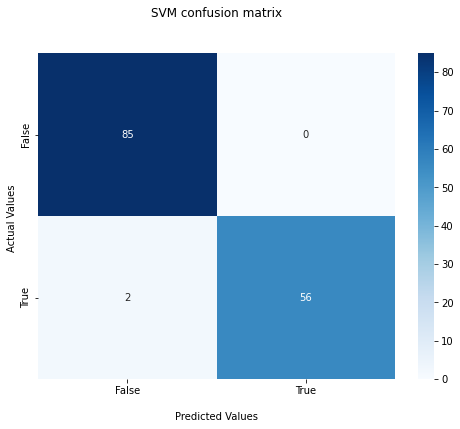

----


K-nearest neighbor


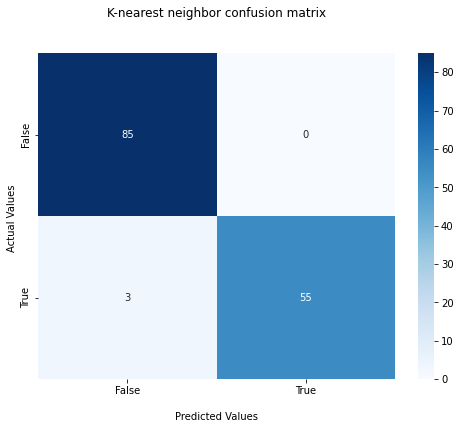

----




In [44]:
for i,(model_name,model) in enumerate(models.items()):
    print(model_name)
    ax = sns.heatmap(cf_m[i], annot=True, cmap='Blues', fmt='.0f')

    ax.set_title(model_name + ' confusion matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    print("----\n\n")

# Tuning model with `GridSearchCV`

In [94]:
def tuning_model(model, param_grid, X, y):
    
    clf = GridSearchCV(estimator=model, 
                       param_grid=param_grid, 
                       cv=5,
                       scoring='f1_macro',
                       verbose=1.0
                      )
    
    grid_result = clf.fit(X, y)
    
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']
    
    for mean, param in zip(means, params):
        print("- f1 score is %f with: %r" % (mean, param))
        
    print('=========================================================')
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    
    return grid_result.best_params_

In [ ]:
def train_with_tuned(model, X_test, y_test):
    

## a. Logistic Regression

In [61]:
penalty = ['l2']
c_values = [100, 30, 10, 3, 1, 0.1, 0.03, 0.01]

In [62]:
param_grid = dict(penalty=penalty, C=c_values)

In [63]:
model = LogisticRegression()

In [95]:
best_params = tuning_model(model, param_grid, X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
- f1 score is 0.968977 with: {'C': 100, 'penalty': 'l2'}
- f1 score is 0.966356 with: {'C': 30, 'penalty': 'l2'}
- f1 score is 0.974196 with: {'C': 10, 'penalty': 'l2'}
- f1 score is 0.961062 with: {'C': 3, 'penalty': 'l2'}
- f1 score is 0.952959 with: {'C': 1, 'penalty': 'l2'}
- f1 score is 0.918835 with: {'C': 0.1, 'penalty': 'l2'}
- f1 score is 0.850093 with: {'C': 0.03, 'penalty': 'l2'}
- f1 score is 0.574676 with: {'C': 0.01, 'penalty': 'l2'}
Best: 0.974196 using {'C': 10, 'penalty': 'l2'}


In [109]:
tuned_model = LogisticRegression(penalty=best_params['penalty'], C=best_params['C'])

In [110]:
tuned_model.fit(X_train, y_train)

LogisticRegression(C=10)

In [111]:
y_pred=tuned_model.predict(X_test)

In [112]:
print(f1_score(y_test, y_pred))

0.9824561403508771


## b. SVM (Classification)

# c. KNN